# XG Boost

Despite not performing well in the baselines, I know XGBoost has a large amount of hyperparameters that can be tuned, so I am hopeful that its performance will improve significantly.

In [1]:
import pandas as pd
from scripts import get_metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('../data/cleaned_data.csv', index_col='id')
df

,status_group,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,0.496455,0.168353,0.003541,0.735849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8776,functional,0.474167,0.892122,0.009148,0.943396,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34310,functional,0.731374,0.734967,0.008164,0.924528,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67743,non functional,0.826875,0.046394,0.001869,0.490566,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19728,functional,0.141899,0.922364,0.013692,0.852830,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,functional,0.704287,0.788246,0.004066,0.735849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
27263,functional,0.525501,0.242120,0.001803,0.679245,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37057,functional,0.410685,0.272182,0.003836,0.924528,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
y = df['status_group']
X = df.drop(['status_group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=212)

## Baseline Model

In [4]:
baseline = XGBClassifier()
baseline.fit(X_train, y_train)
get_metrics(y_test, X_test, baseline)

{'accuracy': 0.7441750841750842,
 'f1': 0.7161396155265648,
 'precision': 0.7469413237149911,
 'recall': 0.7441750841750842}

## GridSearch CV

Time and RAM constraints leave me unable to test every tunable hyperparameter this model offers, so I narrowed it down to a few that seemed the most important.

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
param_grid = {
    'eta': [0.1, 0.3], # default 0.3, aka learning_rate
    'gamma': [0, 3], # default 0, aka min_loss_split
    'max_depth': [6, 8, 10], # default 6
    'min_child_weight': [0.5, 1], # default 1
    'subsample': [0.5, 1], # default 1
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'eta': [0.1, 0.3], 'gamma': [0, 3],
                         'max_depth': [6, 8, 10], 'min_child_weight': [0.5, 1],
                         'subsample': [0.5, 1]},
             scoring='accuracy')

In [7]:
grid_search.best_params_

{'eta': 0.1,
 'gamma': 0,
 'max_depth': 10,
 'min_child_weight': 0.5,
 'subsample': 0.5}

In [8]:
xgb_tuned = XGBClassifier(eta=0.1, gamma=0, max_depth=10, min_child_weight=0.5, subsample=0.5)
xgb_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, xgb_tuned)

{'accuracy': 0.7997979797979798,
 'f1': 0.7865408402000733,
 'precision': 0.7941122092215788,
 'recall': 0.7997979797979798}

In [6]:
param_grid = {
    'eta': [0.05, 0.1], # default 0.3, aka learning_rate
    'gamma': [0], # default 0, aka min_loss_split
    'max_depth': [10, 12], # default 6
    'min_child_weight': [0.25, 0.5, 0.75], # default 1
    'subsample': [0.25, 0.5, 0.75], # default 1
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'eta': [0.05, 0.1], 'gamma': [0],
                         'max_depth': [10, 12],
                         'min_child_weight': [0.25, 0.5, 0.75],
                         'subsample': [0.25, 0.5, 0.75]},
             scoring='accuracy')

In [7]:
grid_search.best_params_

{'eta': 0.05,
 'gamma': 0,
 'max_depth': 12,
 'min_child_weight': 0.75,
 'subsample': 0.75}

In [4]:
xgb_tuned = XGBClassifier(eta=0.05, gamma=0, max_depth=12, min_child_weight=0.75, subsample=0.75)
xgb_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, xgb_tuned)

{'accuracy': 0.8024915824915825,
 'f1': 0.7911600451773849,
 'precision': 0.795282901250696,
 'recall': 0.8024915824915825}

## Bagging

XGBoost already includes regularization that prevents over-fitting, so I don't expect bagging to improve its performance at all.

In [9]:
from sklearn.ensemble import BaggingClassifier

In [10]:
xgb_bagged = BaggingClassifier(XGBClassifier(eta=0.05, gamma=0, max_depth=12, min_child_weight=0.75, subsample=0.75))  
xgb_bagged.fit(X_train, y_train)
get_metrics(y_test, X_test, xgb_bagged)

{'accuracy': 0.8022895622895623,
 'f1': 0.7899042260108825,
 'precision': 0.7954930143029152,
 'recall': 0.8022895622895623}

## Confusion Matrix

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

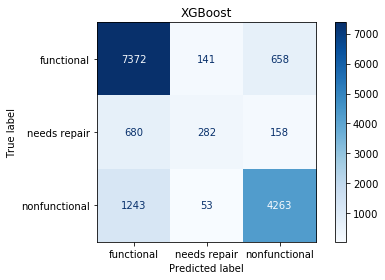

In [7]:
plot_confusion_matrix(xgb_tuned, X_test, y_test, display_labels=['functional', 'needs repair', 'nonfunctional'], cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()
plt.savefig('../visualizations/xgboost-confusion-matrix.png')
plt.show()

## Conclusions

As I thought, tuning the hyperparameters of XGBoost improved its performance significantly - it is not my best performing model. It also has a host of other parameters that can be tuned, so that would be one avenue to investigate if returning to improve this upon the model at a later time. Despite not focusing on other metrics, This XGBoost model also has better precision and recall than my other models.